In [ ]:
import torch
what_were_covering={
    1: "data(prepare and load)",
    2: "build model",
    3: "fitting the model into the data(training)",
    4: "making prediction and evaluating the model",
    5: "saving and loading a model",
    6: "putting it altogether"
}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model into the data(training)',
 4: 'making prediction and evaluating the model',
 5: 'saving and loading a model',
 6: 'putting it altogether'}

In [ ]:
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

Data Preparing and loading
linear regression formula to make straight line with known *parameters*

In [ ]:
#known parameters
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
#usually capital case matrix/tensor, lowercase vector
#here capotal case vector
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

###splitting data into training and test sets

In [ ]:
train_split=int(0.8*len(X))
train_split

40

In [ ]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
torch.randn(1)

tensor([-0.0572])

###better data visualization

In [12]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data,test data and compares pedictions
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  #test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend(prop={"size":14});

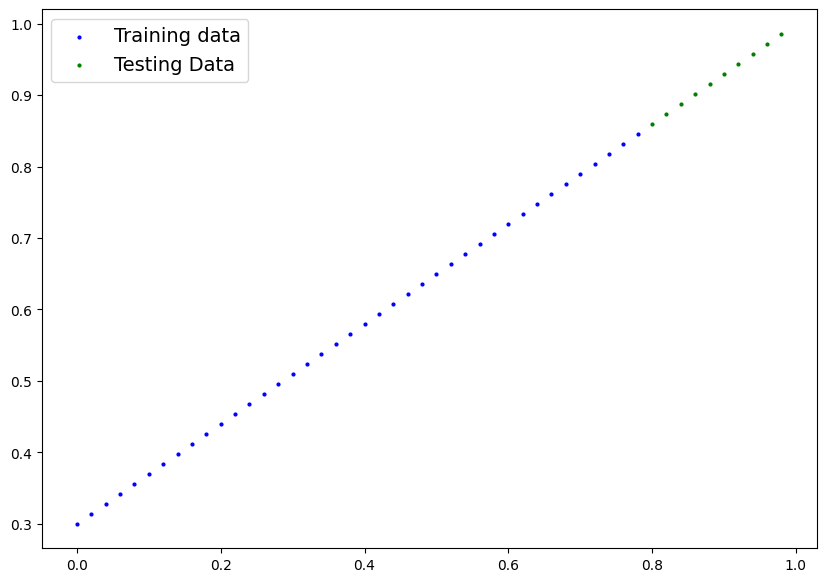

In [ ]:
plot_predictions();

In [ ]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

FIrst pytorch model

In [ ]:
from torch import nn
#create linear reression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          dtype=torch.float,
                              requires_grad=True))

    self.bias=nn.Parameter(torch.randn(1,
                                        dtype=torch.float,
                          requires_grad=True))
  def forward(self,x:torch.tensor)->torch.tensor: # <- x is the inpput data
    return self.weights * x +self.bias #linear regression eqn

In [ ]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bias


(0.7, 0.3)

In [ ]:
###making prediction using 'torch.inference' mode
with torch.inference_mode():
  y_preds=model_0(X_test)
# with torch.no_grad():
#   y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
# y_preds=model_0(X_test)
# y_preds

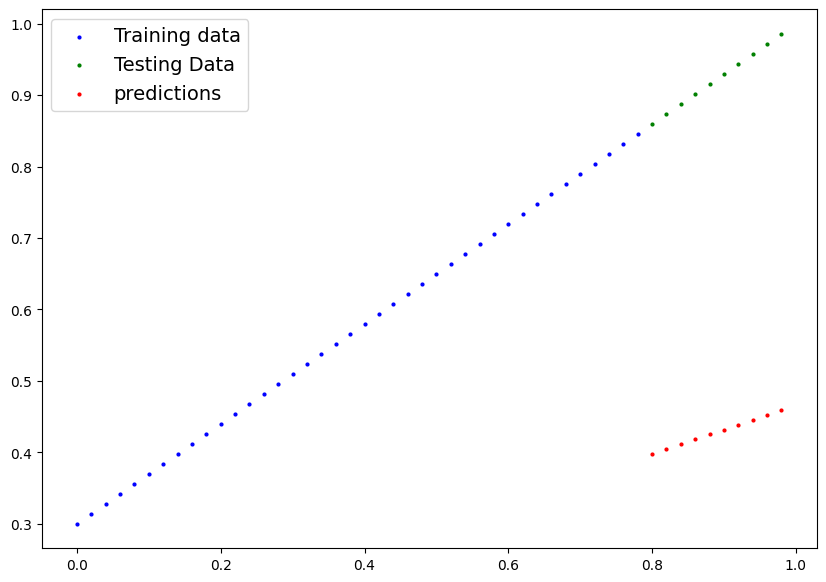

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x7b88b0497840>

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#setup a loss function
loss_fn=nn.L1Loss()

#setup optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [ ]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:

with torch.no_grad():
  list(model_0.parameters())

In [ ]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#Training loop and Testing Loop
epochs=200

epoch_count=[]
loss_values=[]
test_loss_values=[]
#Training loop

for epoch in range(epochs):
  #set model to training mode
  model_0.train()
  #1. Forward pass
  y_pred=model_0(X_train)
  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train)
  # print(f'Loss: {loss}')
  #3.optimizer zero grad
  optimizer.zero_grad()
  #4. perform back propagation on the loss with respect to the parameters of the model
  loss.backward()
  #5.Step the optimizer(perform gradient descent)
  optimizer.step()
  #Testing
  model_0.eval()
  with torch.inference_mode():#with torch.no_grad()
    #1.do the forward pass
    test_pred=model_0(X_test)
    #2.calculate the loss
    test_loss=loss_fn(test_pred,y_test)
  if epoch %10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}| Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0| Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10| Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20| Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30| Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40| Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50| Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60| Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

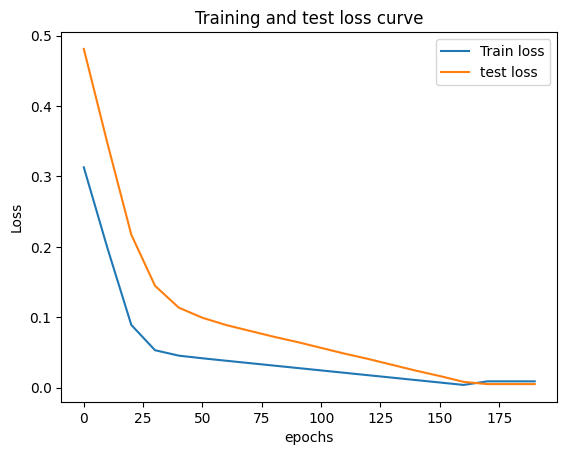

In [ ]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values)),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()

In [ ]:
with torch.inference_mode():
  list(model_0.parameters())

In [ ]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
list(model_0.state_dict())

['weights', 'bias']

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

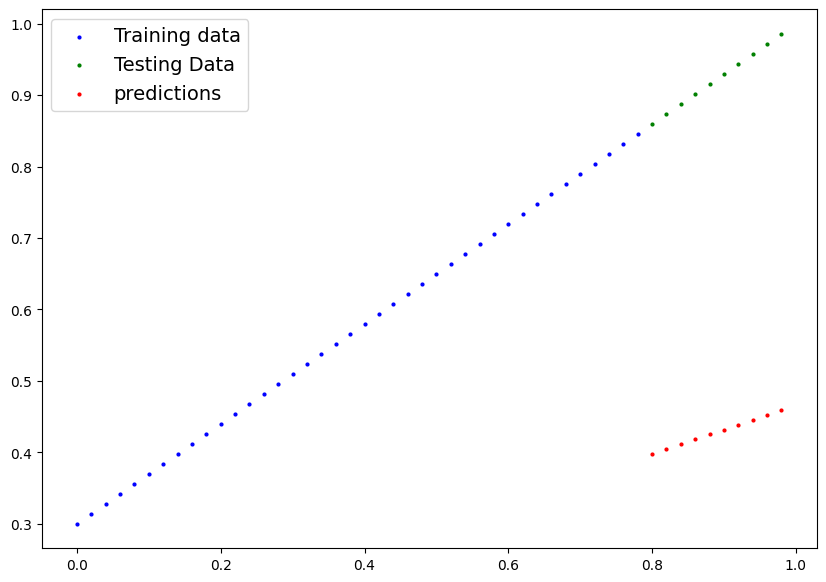

In [ ]:
plot_predictions(predictions=y_preds)

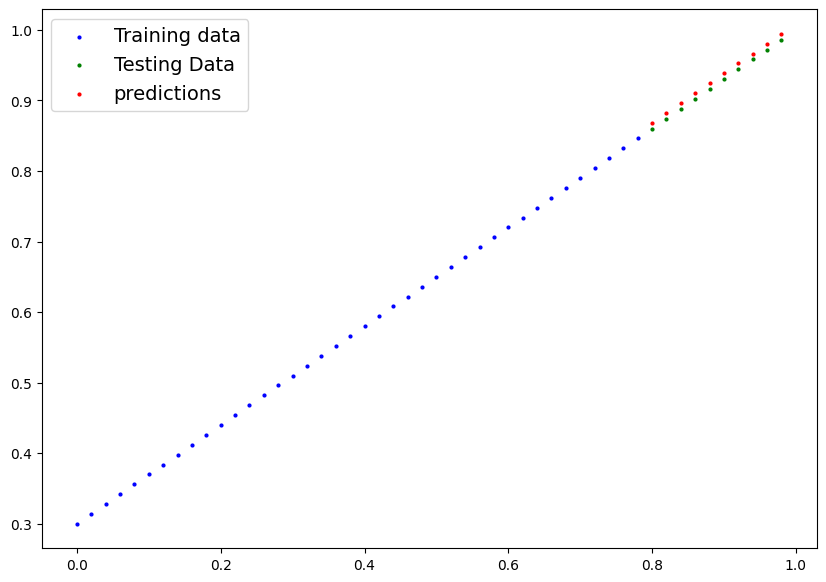

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
from pathlib import Path
#model directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH
# #save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jun 11 13:07 01_pytorch_workflow_model_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#make predictiond
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

In [ ]:
y_preds==loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

In [ ]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

In [5]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device {device}")


Using Device cuda


In [6]:
!nvidia-smi

Thu Jun 12 13:08:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

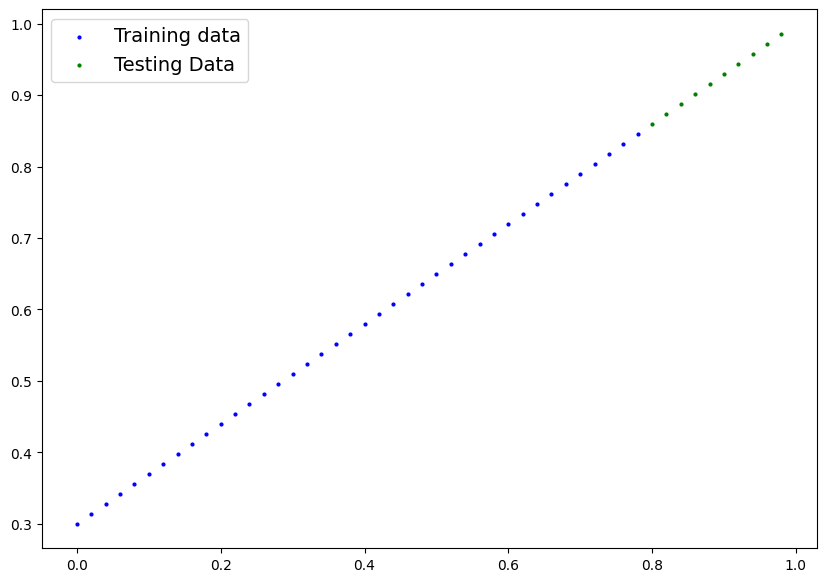

In [13]:
plot_predictions(X_train,y_train,X_test,y_test)

In [28]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)
  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [29]:
next(model_1.parameters()).device

device(type='cpu')

In [30]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [31]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)

In [37]:
torch.manual_seed(42)
epochs=200


X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred=model_1(X_train)

  loss=loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.3017162084579468 | Test loss: 0.2776145935058594
Epoch: 10 | Loss: 0.18650634586811066 | Test loss: 0.14290474355220795
Epoch: 20 | Loss: 0.07129647582769394 | Test loss: 0.008412850089371204
Epoch: 30 | Loss: 0.022868333384394646 | Test loss: 0.04911517724394798
Epoch: 40 | Loss: 0.019271593540906906 | Test loss: 0.044285982847213745
Epoch: 50 | Loss: 0.01583278924226761 | Test loss: 0.03601343557238579
Epoch: 60 | Loss: 0.01240016520023346 | Test loss: 0.02842777408659458
Epoch: 70 | Loss: 0.008967976085841656 | Test loss: 0.02015523985028267
Epoch: 80 | Loss: 0.005529168527573347 | Test loss: 0.011882692575454712
Epoch: 90 | Loss: 0.00209822878241539 | Test loss: 0.004297036211937666
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 110 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.0138

In [38]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [39]:
weight,bias

(0.7, 0.3)

In [41]:
model_1.eval()
with torch.inference_mode():
   y_preds=model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

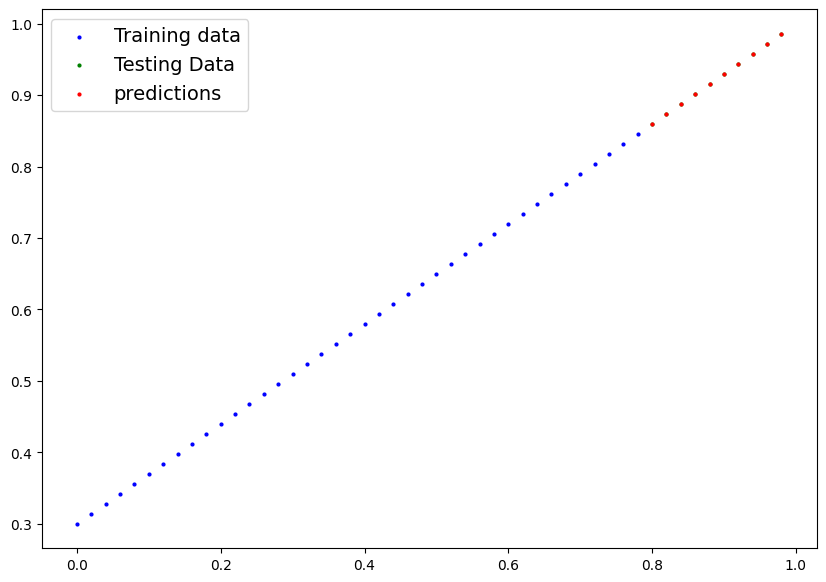

In [42]:
plot_predictions(predictions=y_preds.cpu())

In [46]:
from pathlib import Path
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="01_putorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to: models/01_putorch_workflow_model_1.pth


In [51]:
#Load a pytorch
loaded_model_1=LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [52]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [54]:

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [57]:

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)
y_preds==loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')